In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from luwiji.knn import illustration, demo

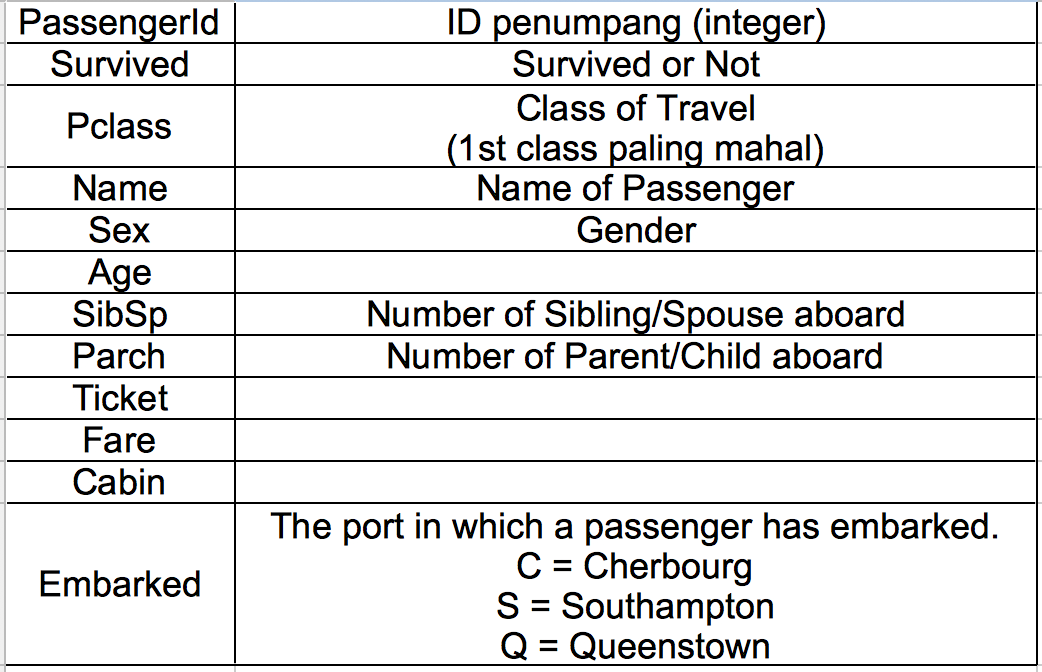

In [2]:
illustration.nomenklatur

In [3]:
df = pd.read_csv('dataset/titanicfull.csv')
df.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked  
0  29.00      0      0   24160  211.3375       B5        S  
1   0.92      1      2  113781  151.5500  C22 C26        S  
2   2.00      1      2  113781  151.5500  C22 C26        S  
3  30.00      1      2  113781  151.5500  C22 C26        S  
4  25.00      1      2  113781  151.5500  C22 C26        S

In [4]:
df.drop(columns=['name', 'ticket'], inplace=True)

- Quick EDA

In [5]:
from jcopml.plot import plot_missing_value

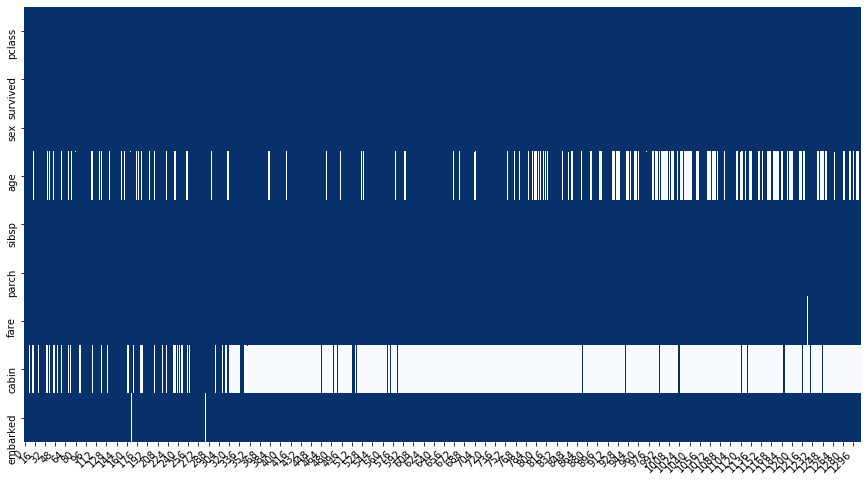

In [6]:
plot_missing_value(df)

In [7]:
df.drop(columns=['age', 'cabin'], inplace=True)

In [8]:
df.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [9]:
df.fillna({'embarked':'S'}, inplace=True)

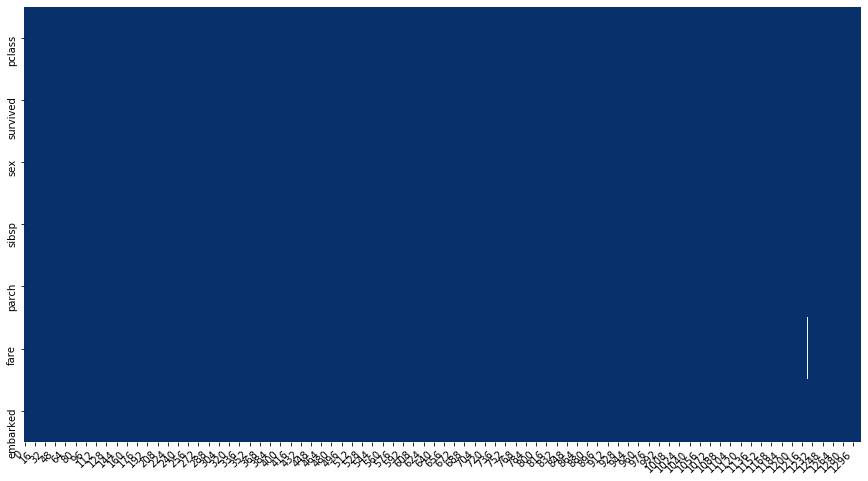

In [10]:
plot_missing_value(df)

In [11]:
df.fare.value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
13.7917     1
10.7083     1
7.7417      1
7.8208      1
34.6542     1
Name: fare, Length: 281, dtype: int64

In [12]:
df.fillna({'fare':'8.0500'}, inplace=True)

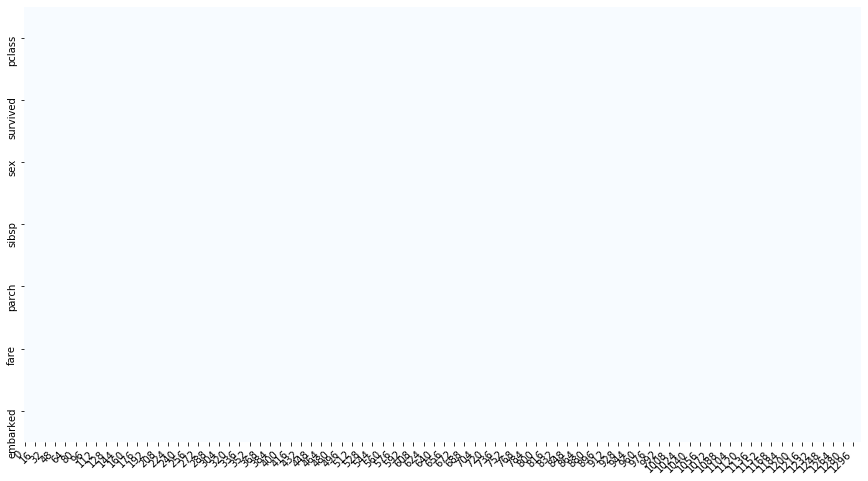

In [13]:
plot_missing_value(df)

- Persiapan data

In [14]:
df.head()

pclass  survived     sex  sibsp  parch     fare embarked
0       1         1  female      0      0  211.338        S
1       1         1    male      1      2   151.55        S
2       1         0  female      1      2   151.55        S
3       1         0    male      1      2   151.55        S
4       1         0  female      1      2   151.55        S

In [15]:
X = df.drop(columns='survived')
y = df.survived

X = pd.get_dummies(X, columns=['pclass', 'sex', 'embarked'])

- Intro Scikit-Learn

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [18]:
knn.score(X, y)

0.8701298701298701